# Melbourne House Price Prediction

# 1. Examine and explore data (visualization, interactions among features)

In [2]:
import pandas as pd 
data = pd.read_csv("MELBOURNE_HOUSE_PRICES_LESS.csv")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63023 entries, 0 to 63022
Data columns (total 13 columns):
Suburb           63023 non-null object
Address          63023 non-null object
Rooms            63023 non-null int64
Type             63023 non-null object
Price            48433 non-null float64
Method           63023 non-null object
SellerG          63023 non-null object
Date             63023 non-null object
Postcode         63023 non-null int64
Regionname       63023 non-null object
Propertycount    63023 non-null int64
Distance         63023 non-null float64
CouncilArea      63023 non-null object
dtypes: float64(2), int64(3), object(8)
memory usage: 6.3+ MB


In [63]:
data.describe().T

count           mean            std      min       25%  \
Rooms          48433.0       3.071666       0.944708      1.0       2.0   
Price          48433.0  997898.241488  593498.919037  85000.0  620000.0   
Postcode       48433.0    3123.210332     125.534940   3000.0    3051.0   
Propertycount  48433.0    7566.399913    4457.405884     39.0    4280.0   
Distance       48433.0      12.702761       7.550030      0.0       7.0   

                    50%        75%         max  
Rooms               3.0        4.0        31.0  
Price          830000.0  1220000.0  11200000.0  
Postcode         3103.0     3163.0      3980.0  
Propertycount    6567.0    10412.0     21650.0  
Distance           11.7       16.7        55.8

In [13]:
#correlation matrix
from pandas import DataFrame
import plotly.graph_objs as go

list_data = [[row[2],row[4],row[10],row[11]] for row in data.values]
df_train = DataFrame(list_data, columns=['Rooms','Price','Propertycount','Distance'])
corrmat = df_train.corr()

#create the chart
sns_colorscale = [[0.0, '#3f7f93'], #cmap = sns.diverging_palette(220, 10, as_cmap = True)
 [0.071, '#5890a1'],
 [0.143, '#72a1b0'],
 [0.214, '#8cb3bf'],
 [0.286, '#a7c5cf'],
 [0.357, '#c0d6dd'],
 [0.429, '#dae8ec'],
 [0.5, '#f2f2f2'],
 [0.571, '#f7d7d9'],
 [0.643, '#f2bcc0'],
 [0.714, '#eda3a9'],
 [0.786, '#e8888f'],
 [0.857, '#e36e76'],
 [0.929, '#de535e'],
 [1.0, '#d93a46']]

heat = go.Heatmap(z=corrmat,
                  x=df_train.columns,
                  y=df_train.columns,
                  xgap=1, ygap=1,
                  colorscale=sns_colorscale,
                  colorbar_thickness=20,
                  colorbar_ticklen=3,
                  hovertext =df_train.columns,
                  hoverinfo='text',                  
                   )


title = 'Correlation Matrix'               

layout = go.Layout(title_text=title, title_x=0.5, 
                   width=600, height=600,
                   xaxis_showgrid=False,
                   yaxis_showgrid=False,
                   yaxis_autorange='reversed')
   
fig=go.Figure(data=[heat], layout=layout)        
fig.show() 

# Price And Rooms Are Most Correlation

# 2.Apply the model for prediction with holdout and cross validation


In [84]:

from sklearn.linear_model import LinearRegression
import plotly.graph_objects as go
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from plotly.offline import iplot

data = pd.read_csv("MELBOURNE_HOUSE_PRICES_LESS.csv")
data = data.dropna()

data_sort = [[row[4],row[2]] for row in data.values]

data_sort = sorted(data_sort,key=lambda x: x[1])
# price
X = [[row[0]] for row in data_sort]

# rooms
y = [[row[1]] for row in data_sort]
# Holdout method:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)


df=pd.DataFrame({'Price':X_train,
                     'Rooms': y_train})


model = sm.OLS(X_train, y_train).fit()

df['bestfit']=model.fittedvalues

# plotly setup
fig=go.Figure()

# source data
fig.add_trace(go.Scatter(x=X_train,
                         y=y_train,
                         mode='markers',
                         name = 'Trained Price And Rooms')
             )

# regression data
fig.add_trace(go.Scatter(x=X_train,
                         y=df['bestfit'],
                         mode='lines',
                         name='best fit',
                         line=dict(color='firebrick', width=2)
                        ))
fig.add_trace(go.Scatter(x=X_test,
                         y=y_test,
                         mode='markers',
                         name = 'Test Price And Rooms')
             )
fig.show()

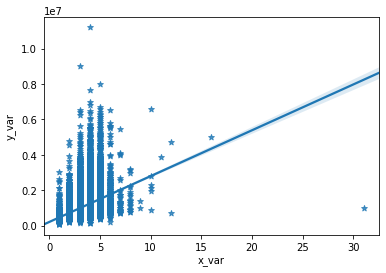

In [85]:
import seaborn as sns
numeric_data=data.loc[:,('Rooms','Price')]
numeric_data.Rooms= numeric_data.Rooms.astype(dtype='int64')
numeric_data.Price= numeric_data.Price.astype(dtype='int64')
x, y = pd.Series(numeric_data.Rooms, name="x_var"), pd.Series(numeric_data.Price, name="y_var")
ax = sns.regplot(x=x, y=y, marker="*")

In [66]:
# predict the Bedrooms from Rooms in test sample and get Mean Squared Error.
from sklearn.metrics import mean_squared_error
y_predict = model.predict(X_test)
print("Mean squared error is: %.4f"%mean_squared_error(y_test, y_predict))

Mean squared error is: 0.7271


In [68]:
# Cross Validation:
from sklearn.model_selection  import KFold, cross_val_score
model = LinearRegression()
model.fit(X_train, y_train)
scores = cross_val_score(model, X, y, scoring='r2', cv=5)
print(scores)

[0.17062487 0.17732839 0.18104116 0.17032244 0.15106043]


# 3. Using PCA, apply the model with holdout and cross validation

In [69]:
from sklearn.decomposition import PCA
numeric_data=data.loc[:,('Rooms','Price')]
pca = PCA(n_components=2,svd_solver='full')
pca.fit(numeric_data)
print (pca.explained_variance_)  #parameter returns a vector of the variance explained by each dimension
print (pca.explained_variance_ratio_) #gives the variance explained solely by the i+1st dimension.
print (pca.explained_variance_ratio_.cumsum()) # return a vector x such that x[i] returns the cumulative variance explained by the first i+1 dimensions

[3.52240967e+11 7.40658912e-01]
[1.0000000e+00 2.1027052e-12]
[1. 1.]


In [75]:
# Holdout:
train, test = train_test_split(numeric_data, test_size=0.2, random_state=42) #test_size = 20% in data
x_train = pd.DataFrame(train.Rooms)
y_train = train.Price
x_test = pd.DataFrame(test.Rooms)
y_test = test.Price

# Train the model
model = LinearRegression()
model.fit(x_train, y_train)
# print result
c = model.coef_[0]
i = model.intercept_
print("For x is {} and y is {}".format('Rooms', 'Price'))
print('=> Formula:','y = {}x + {}'.format(c, i) if i>=0 else 'y={}x - {}'.formar(c,i))

For x is Rooms and y is Price
=> Formula: y = 258676.1873340654x + 202685.12758571724


In [76]:
# predict the Price from Rooms in test sample and get Mean Squared Error.
y_predict = model.predict(x_test)
print("Mean squared error is: %.4f"%mean_squared_error(y_test, y_predict))

Mean squared error is: 283002460011.9064


In [78]:
y_Datapredict = model.predict(numeric_data.Price.values.reshape(data.shape[0],1))
x_Datapredict = model.predict(numeric_data.Rooms.values.reshape(data.shape[0],1))
print("Mean squared error is: %.4f"%mean_squared_error(x_Datapredict, y_Datapredict))

Mean squared error is: 90201096299613559717888.0000


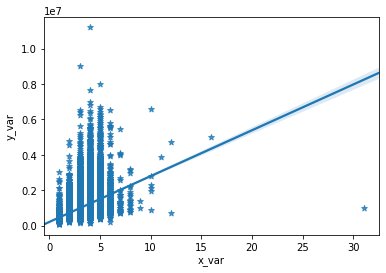

In [83]:
import seaborn as sns
numeric_data.Rooms= numeric_data.Rooms.astype(dtype='int64')
numeric_data.Price= numeric_data.Price.astype(dtype='int64')
x, y = pd.Series(numeric_data.Rooms, name="x_var"), pd.Series(numeric_data.Price, name="y_var")
ax = sns.regplot(x=x, y=y, marker="*")

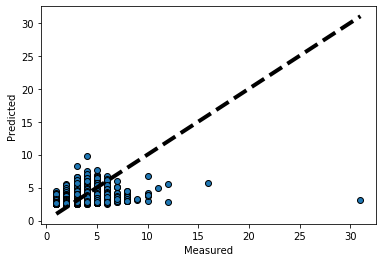

In [89]:
#Cross Validation:
from sklearn.model_selection import cross_val_predict
import matplotlib.pyplot as plt
model = LinearRegression()
model.fit(x_train, y_train)
y = numeric_data.Rooms.values.reshape(data.shape[0],1)

# cross_val_predict returns an array of the same size as `y` where each entry
# is a prediction obtained by cross validation:
predicted = cross_val_predict(model, numeric_data.Price.values.reshape(data.shape[0],1), y, cv=10)

fig, ax = plt.subplots()
ax.scatter(y, predicted, edgecolors=(0, 0, 0))
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

# 4. Visualize the residue and homoscedasticity

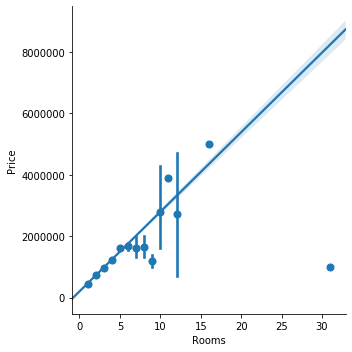

In [91]:
data_rooms_price = data.loc[:,('Rooms','Price')]
sns.lmplot(x="Rooms", y="Price",data=data_rooms_price,x_estimator=np.mean)

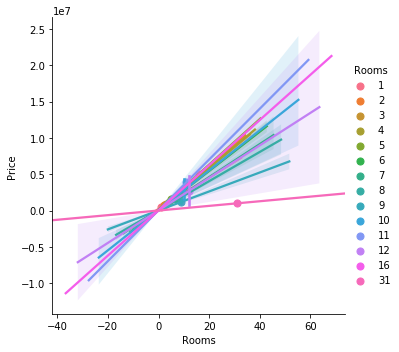

In [92]:
sns.lmplot(x="Rooms", y="Price",data=data_rooms_price,x_estimator=np.mean,hue="Rooms")

In [98]:
X = data_rooms_price.Rooms.values.reshape(data_rooms_price.shape[0],1)
y = data_rooms_price.Price
predict = model.predict(X)
a = (y.values - predict)

MemoryError: 

ValueError: x and y must be the same size

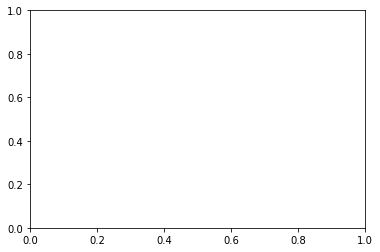

In [99]:
fig,ax = plt.subplots()
ax.scatter(data_rooms_price.Rooms.values, a)
ax.set_xlabel('Rooms')
ax.set_ylabel('Residual')
plt.show()

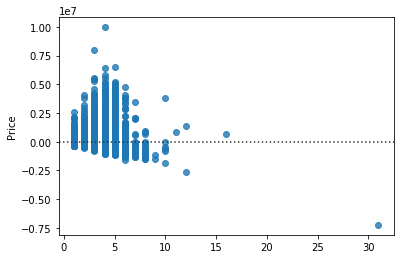

In [100]:
sns.residplot(x=X,y=y,data=data_rooms_price)

# 5. Tune the model if necessary

# 6. Write up analysis for each section (for example, explain why the model is overfitting, explain why applying PCA is better, etc.)

# 7. Include conclusions for summary